In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
plt.rc("figure", figsize=(10, 5))
plt.rc("savefig", dpi=90)
plt.rc("font",family="sans-serif")
plt.rc("font",size=14)

In [2]:
Stock_Returns = pd.read_csv('Big9Returns2017.csv', parse_dates=['Date'])
Stock_Returns = Stock_Returns.sort_values(by='Date')
Stock_Returns.set_index('Date', inplace=True)
Stock_Returns.head() 

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


## Exploratory data analysis

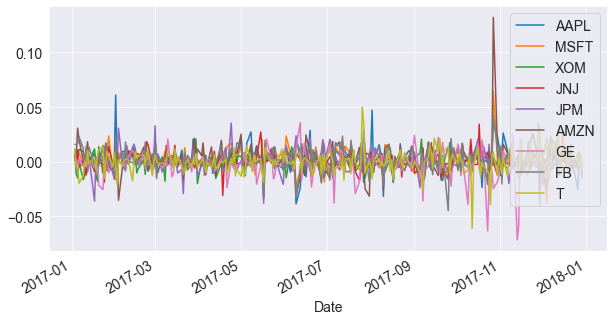

In [3]:
Stock_Returns.plot()

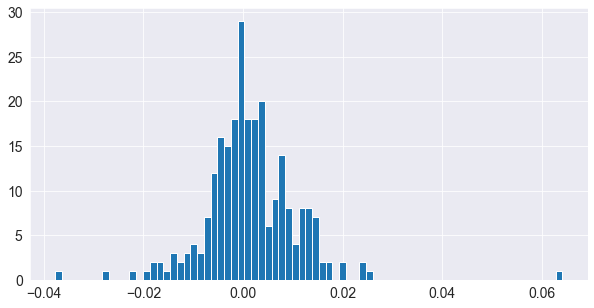

In [4]:
plt.hist(Stock_Returns["MSFT"].dropna(), bins=75, density=False)
plt.show()

## Measure Risk
Standard deviation or variance of daily returns;
Kurtosis of the daily returns distribution;
Skewness of the daily returns distribution

In [5]:
import numpy as np
np.mean(Stock_Returns["MSFT"])

0.001405223508794588

In [6]:
### average annualized return assuming 252 trading days in a year
((1+np.mean(Stock_Returns["MSFT"]))**252)-1

0.42456677615481975

In [7]:
np.std(Stock_Returns["MSFT"])

0.009306242470890874

In [8]:
np.std(Stock_Returns["MSFT"])**2

8.660614892701309e-05

In [9]:
# Scaling Volatility: Volatility scales with the square root of time; normally assume 252 trading days in a given year
# and 21 trading days in a given month
np.std(Stock_Returns["MSFT"]) * np.sqrt(252)

0.14773201931066704

In [10]:
# Skewness is the third moment of a distribution; Prefer positive skewness
# Skewness is higher than 0 suggesting non-normality
from scipy.stats import skew
skew(Stock_Returns["MSFT"].dropna())

0.8600576563864372

In [11]:
# kurtosis, a measure of the thickness of the tails of a distribution
# Calculate the excess kurtosis of returns:
from scipy.stats import kurtosis
kurtosis(Stock_Returns["MSFT"].dropna())
# excess kurtosis greater than 0 suggesting non-normality

8.672851104304732

In [12]:
# Shapiro-Wilk test for normality
from scipy import stats
p_value = stats.shapiro(Stock_Returns["MSFT"].dropna())[1]
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

Null hypothesis of normality is rejected.


# Portfolio Composition

In [13]:
# calculate the portfolio return for a set of portfolio weights
portfolio_weights = np.array([0.05, 0.15,0.05, 0.15, 0.10,0.10,0.10, 0.20, 0.10])
port_ret = Stock_Returns.mul(portfolio_weights, axis=1).sum(axis=1)
Stock_Returns["Portfolio"] = port_ret
port_ret



Date
2017-01-03    0.008553
2017-01-04    0.001709
2017-01-05    0.005719
2017-01-06    0.005948
2017-01-09   -0.000002
                ...   
2017-12-22   -0.001763
2017-12-26   -0.001939
2017-12-27    0.002804
2017-12-28    0.002044
2017-12-29   -0.006057
Length: 251, dtype: float64

In [14]:
# calculate the portfolio return for an equally weighted portfolio
numstocks = 9
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
Stock_Returns['Portfolio_EW']= Stock_Returns.iloc[:,0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
                                                                       

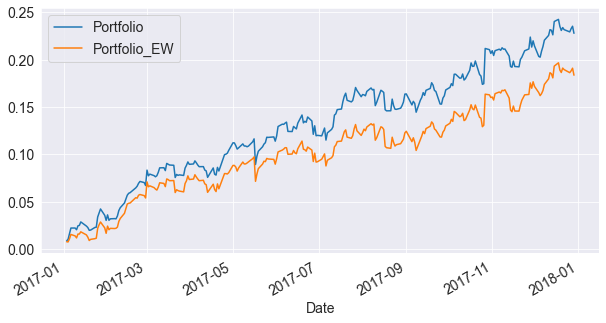

In [15]:
# plot the cumulative returns of multiple portfolios
CumulativeReturns = ((1+Stock_Returns).cumprod()-1)
CumulativeReturns[["Portfolio","Portfolio_EW"]].plot()

### Market Capitalization Weights
The value of a company's publically traded shares

In [16]:
# Market-Cap Weighted Portfolios
market_capitalizations = np.array([100, 200, 100,  200, 100,  200, 100,  200,100])
mcap_weights = market_capitalizations/sum(market_capitalizations)
mcap_weights


array([0.07692308, 0.15384615, 0.07692308, 0.15384615, 0.07692308,
       0.15384615, 0.07692308, 0.15384615, 0.07692308])

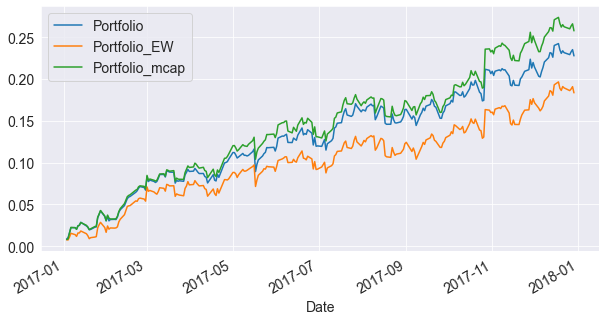

In [17]:
Stock_Returns['Portfolio_mcap']= Stock_Returns.iloc[:,0:numstocks].mul(mcap_weights , axis=1).sum(axis=1)

CumulativeReturns = ((1+Stock_Returns).cumprod()-1)
CumulativeReturns[["Portfolio","Portfolio_EW", 'Portfolio_mcap']].plot()

### Correlation Matrix

In [18]:
Stock_Returns = pd.read_csv('Big9Returns2017.csv', parse_dates=['Date'])
Stock_Returns = Stock_Returns.sort_values(by='Date')
Stock_Returns.set_index('Date', inplace=True)
correlation_matrix = Stock_Returns.corr()
cor_mat_annual = correlation_matrix*252
print(cor_mat_annual)

            AAPL        MSFT         XOM         JNJ         JPM        AMZN  \
AAPL  252.000000  110.232330   13.987204    9.684857   50.378405  128.386880   
MSFT  110.232330  252.000000   21.195335   58.014181   48.194509  156.516096   
XOM    13.987204   21.195335  252.000000   30.494908   77.093472    3.809727   
JNJ     9.684857   58.014181   30.494908  252.000000   17.722667   13.300704   
JPM    50.378405   48.194509   77.093472   17.722667  252.000000    3.507591   
AMZN  128.386880  156.516096    3.809727   13.300704    3.507591  252.000000   
GE      1.704954  -11.296389   48.852980   17.118268   64.864966  -23.231454   
FB    136.676592  136.921899  -11.796886   20.006606   24.001752  164.563578   
T       1.280590   -5.311814   49.789058   23.088666   63.713640   -4.513160   

              GE          FB           T  
AAPL    1.704954  136.676592    1.280590  
MSFT  -11.296389  136.921899   -5.311814  
XOM    48.852980  -11.796886   49.789058  
JNJ    17.118268   20.00660

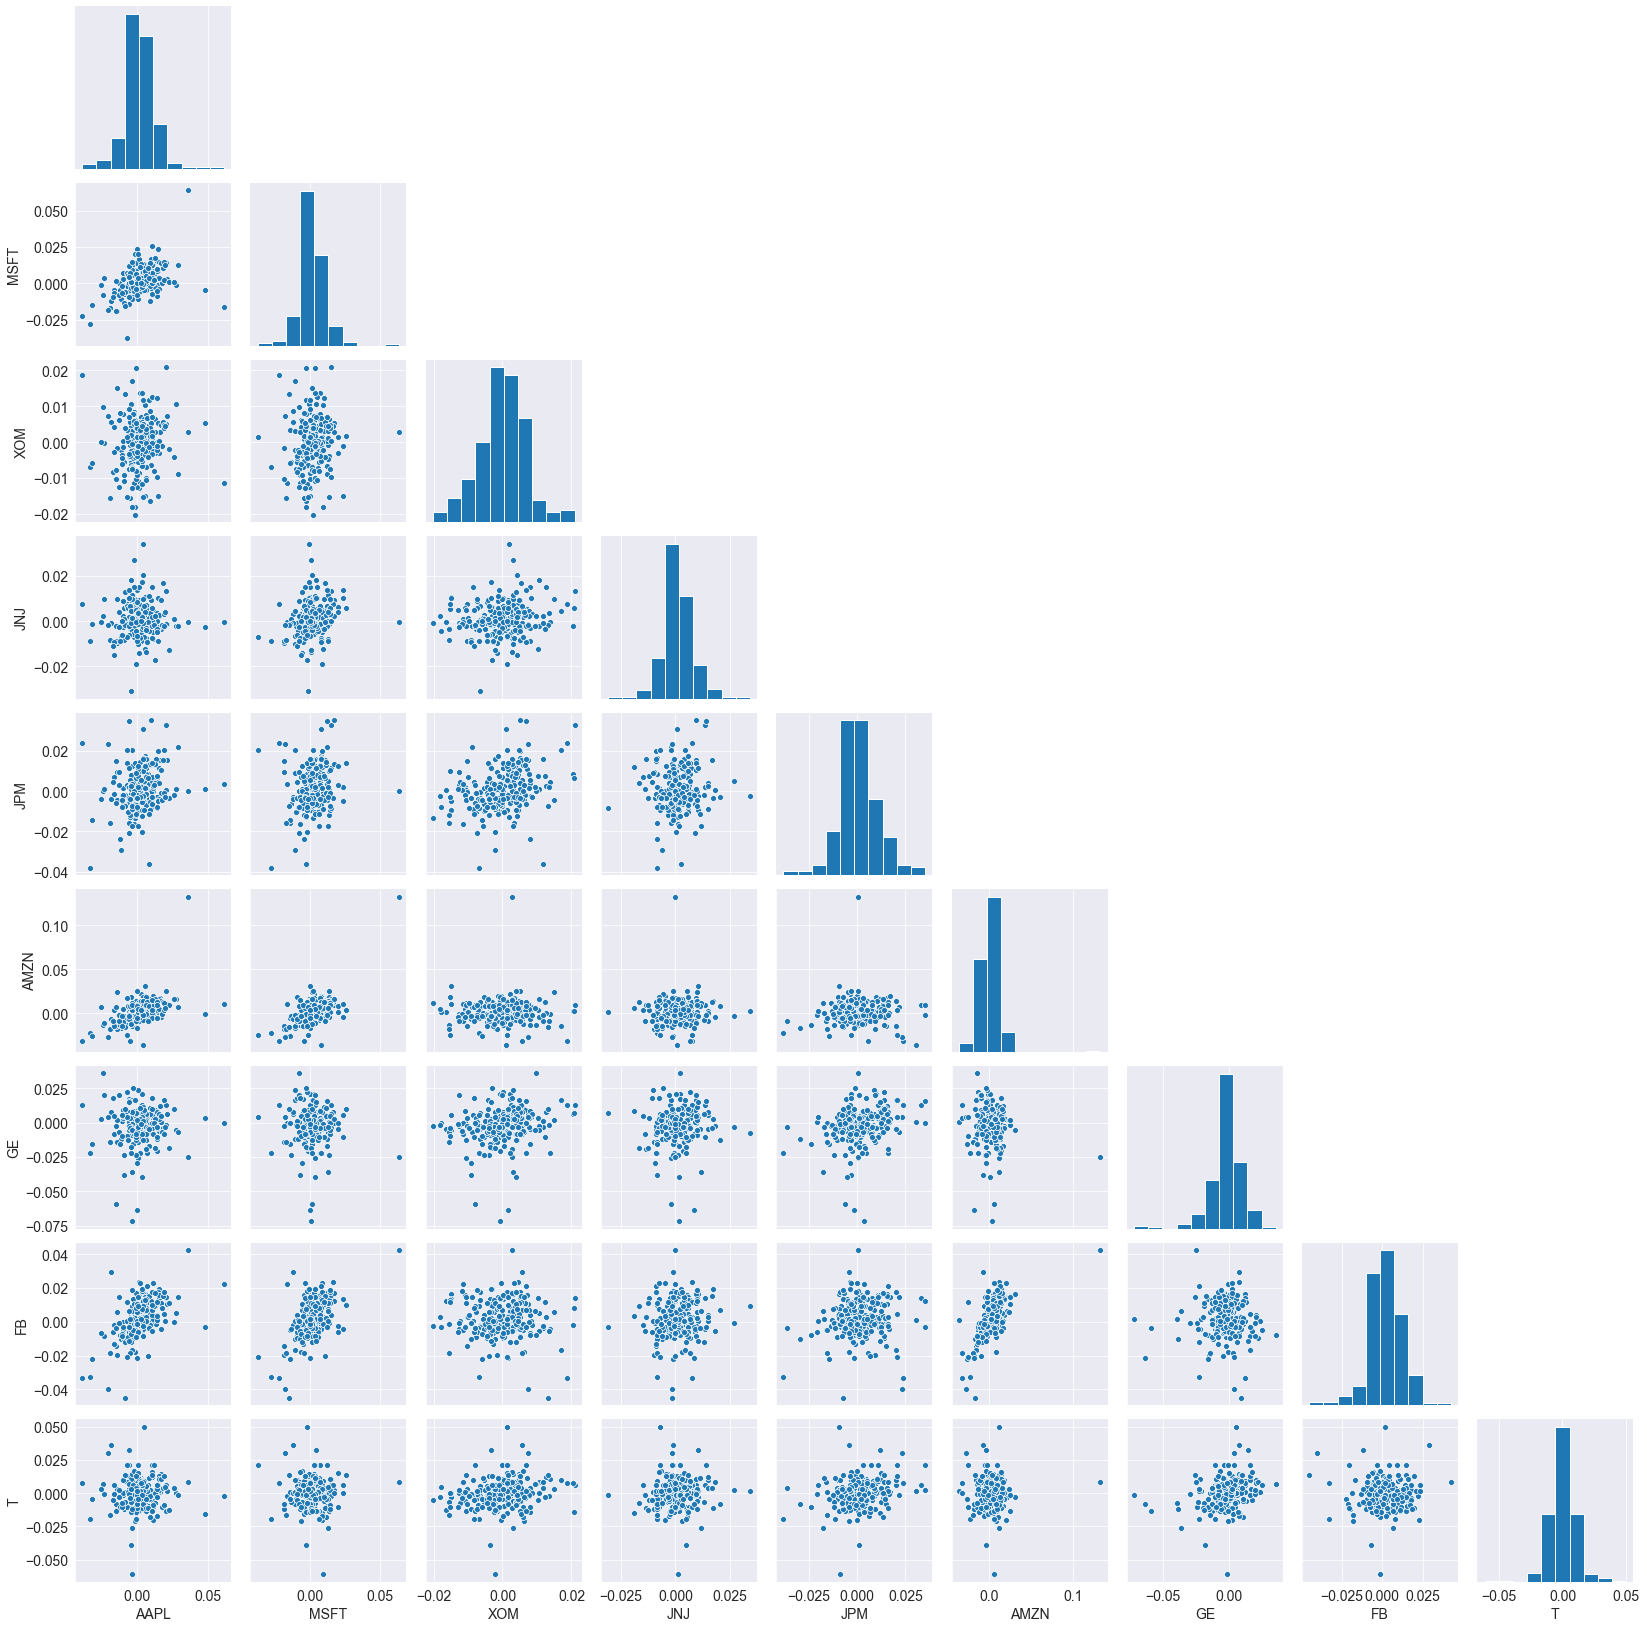

In [19]:
sns.pairplot(Stock_Returns, corner=True)


In [20]:
## Co-Variance Matrix
cov_mat = Stock_Returns.cov()
## annualize the covariance matrix
cov_mat_annual = cov_mat*252
cov_mat_annual

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,0.030996,0.011400,0.001093,0.000774,0.005716,0.018805,0.000236,0.016243,0.000152
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597,0.019275,-0.001315,0.013682,-0.000530
XOM,0.001093,0.001392,0.012500,0.001548,0.005554,0.000354,0.004295,-0.000890,0.003751
JNJ,0.000774,0.003899,0.001548,0.013092,0.001307,0.001266,0.001540,0.001545,0.001780
JPM,0.005716,0.004597,0.005554,0.001307,0.026371,0.000474,0.008283,0.002631,0.006972
AMZN,0.018805,0.019275,0.000354,0.001266,0.000474,0.043954,-0.003830,0.023290,-0.000638
GE,0.000236,-0.001315,0.004295,0.001540,0.008283,-0.003830,0.039270,-0.000821,0.009849
FB,0.016243,0.013682,-0.000890,0.001545,0.002631,0.023290,-0.000821,0.028937,-0.000708
T,0.000152,-0.000530,0.003751,0.001780,0.006972,-0.000638,0.009849,-0.000708,0.028833


In [21]:
# calculate portfolio volatility assume a weights array and a covariance matrix
weights=np.array([0.05, 0.15,0.05, 0.15, 0.10,0.10,0.10, 0.20, 0.10])
port_vol = np.sqrt(np.dot(weights.T, np.dot(correlation_matrix, weights)))
port_vol

0.5342737810381923

#### Markowitz Portfolios
* MSR: Max Sharpe Ratio portfolio
* GMV: Global Minimum Volatility portfolio

# The Capital Asset Pricing Model
Excess Return = Return − Risk Free Return

E($R_{p}$) − RF = $β_{M}$ (E($R_{M}$ ) − RF )

E($R_{p}$ ) − RF : The excess expected return of a stock or portfolio P

E($R_{M}$ ) − RF : The excess expected return of the broad market portfolio B

RF : The regional risk free-rate
    
$β_{M}$ : Portfolio beta, or exposure, to the broad market portfolio B


In [22]:
Data=pd.read_csv('FamaFrenchFactors.csv')
Data['date'] = pd.to_datetime(Data['Date'], format='%Y-%m-%d')
Data.set_index(['Date'], inplace = True)
Data=Data.drop(columns='date')
Data.head()


,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


### Calculating Beta Using Co-Variance

In [23]:
covariance_matrix = Data[["Portfolio","Market_Excess"]].cov()
covariance_coefficient = covariance_matrix.iloc[0,1]
benchmark_variance = Data["Market_Excess"].var()
portfolio_beta = covariance_coefficient / benchmark_variance
portfolio_beta

0.9738085477940357

### Calculating Beta Using Linear Regression

In [29]:
import statsmodels.api as sm
X =  Data["Market_Excess"]
y = Data["Portfolio"]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.params)
# R-Squared vs Adjusted R-Squared
print(model.rsquared)
print(model.rsquared_adj)

const            0.000224
Market_Excess    0.973809
dtype: float64
0.794502321892429
0.7943387090913879


# Alpha and Multi-Factor Models
## Fama-French 3 Factor Model
$R_{p}$ = RF + $β_{M}$ (E($R_{M}$ ) − RF ) + $b_{SMB}$ ⋅ SMB + $b_{HML}$ ⋅ HML + α

SMB: The small minus big factor
    
 $b_{SMB}$ : Exposure to the SMB factor
    
HML: The high minus low factor
    
$b_{HML}$ : Exposure to the HML factor
    
α: Performance which is unexplained by any other factors
    
$β_{M}$ : Beta to the broad market portfolio B

In [30]:
X =  Data[["Market_Excess", 'SMB','HML']]
y = Data["Portfolio"]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.params)
# R-Squared vs Adjusted R-Squared
print(model.rsquared)
print(model.rsquared_adj)

const            0.000191
Market_Excess    1.015531
SMB             -0.262151
HML             -0.108672
dtype: float64
0.8198995753534163
0.8194687130934962


In [31]:
# P-Values and Statistical Significance
print(model.pvalues["HML"])
model.pvalues["HML"] < 0.05

4.6546317150002245e-07


True

In [33]:
# Alpha and the Efficient Market Hypothesis
portfolio_alpha = model.params["const"]
portfolio_alpha_annualized = ((1+portfolio_alpha)**252)-1
portfolio_alpha_annualized


0.049410766185005395

In [34]:
Data.columns

Index(['Portfolio', 'Market_Excess', 'SMB', 'HML', 'RMW', 'CMA', 'RF'], dtype='object')

## Fama-French 5 Factor Model

In [40]:
X =  Data[["Market_Excess", 'SMB','HML','RMW', 'CMA', 'RF']]
y = Data["Portfolio"]
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print('model coefficient:\n', model.params)
# R-Squared vs Adjusted R-Squared
print('R-Squared:\n',model.rsquared)
print('Adjusted R-Squared:\n',model.rsquared_adj)

model coefficient:
 const             0.000317
Market_Excess     0.973460
SMB              -0.273209
HML               0.072425
RMW              -0.070384
CMA              -0.471495
RF              -16.581613
dtype: float64
R-Squared:
 0.8381790908320201
Adjusted R-Squared:
 0.8374029713635885


# Estimating Tail Risk
Tail risk is the risk of extreme investment outcomes, most notably on the negative
side of a distribution.

In [42]:
StockReturns=pd.read_csv('USO.csv')
StockReturns['Date'] = pd.to_datetime(StockReturns['Date'], format='%Y-%m-%d')
StockReturns.set_index(['Date'], inplace = True)

StockReturns.head()

,USO
Date,
2007-01-03,-0.042636
2007-01-04,-0.040688
2007-01-05,0.009285
2007-01-08,-0.007109
2007-01-09,-0.004001


## Historical Drawdown
Drawdown is the percentage loss from
the highest cumulative historical point.

Drawdown=Cumulative return at time t / Running maximum

In [43]:
running_max = np.maximum.accumulate(StockReturns)
running_max[running_max < 1] = 1
drawdown = (StockReturns)/running_max - 1
drawdown.head()

,USO
Date,
2007-01-03,-1.042636
2007-01-04,-1.040688
2007-01-05,-0.990715
2007-01-08,-1.007109
2007-01-09,-1.004001


## Historical Value at Risk

Value at Risk, or VaR, is a threshold
with a given confidence level that losses
will not (or more accurately, will not
historically) exceed a certain level.

In [46]:
var_level = 95
var_95 = np.percentile(StockReturns, 100 - var_level)
print(var_95)

-0.03608233764037496


## Historical Expected Shortfall
Conditional Value at Risk, or CVaR, is
an estimate of expected losses
sustained in the worst 1 - x% of
scenarios.

In [47]:
cvar_95 = StockReturns[StockReturns <= var_95].mean()
print(cvar_95)

USO   -0.050541
dtype: float64


## Parametric VaR

Sample from a probability distribution to simulate

In [77]:
from scipy.stats import norm
mu = np.mean(StockReturns)
std = np.std(StockReturns)
confidence_level = 0.05
VaR = norm.ppf(confidence_level, mu, std)
VaR


array([-0.03628909])

## Scaling Risk
From a one-day estimate of VaR(95) var_95 to estimate 5-day VaR(95)

In [78]:
forecast_days = 5
forecast_var95_5day = var_95*np.sqrt(forecast_days)
forecast_var95_5day

-0.08068255975097778

# Random Walks
simulate a random walk

In [48]:
mu = np.mean(StockReturns)
std = np.std(StockReturns)
T = 252
S0 = 10
rand_rets = np.random.normal(mu,std,T) + 1
forecasted_values = S0*(rand_rets.cumprod())
forecasted_values[:5]

array([ 9.97956334,  9.83081906, 10.13090038, 10.13420624, 10.19565369])

## Monte Carlo Simulations
A series of Monte Carlo simulations of a single asset starting at stock price 10 at $T_{0}$. Forecasted for 1 year (252 trading days along the x-axis):

In [80]:
# To calculate the VaR(95) of 100 Monte Carlo simulations

mu = 0.0005
vol = 0.001
T = 252
sim_returns = []
for i in range(100):
    rand_rets = np.random.normal(mu,vol,T)
    sim_returns.append(rand_rets)
    var_95 = np.percentile(sim_returns, 5)
var_95


-0.0011457680539133728